## Water Quality Prediction using ML algorithms 

* Simran Nisarg Modi
  
# Dataset
* Source of the dataset : Kaggle
* Dataset features and their description: [Features](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Reading the dataset
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
# Categorical variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
# Missing values in the dataset
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 491  |  Percentage: 14.99
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 0  |  Percentage: 0.0
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 781  |  Percentage: 23.84
Feature 6 >> Missing entries: 0  |  Percentage: 0.0
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 162  |  Percentage: 4.95
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 0  |  Percentage: 0.0


<Axes: >

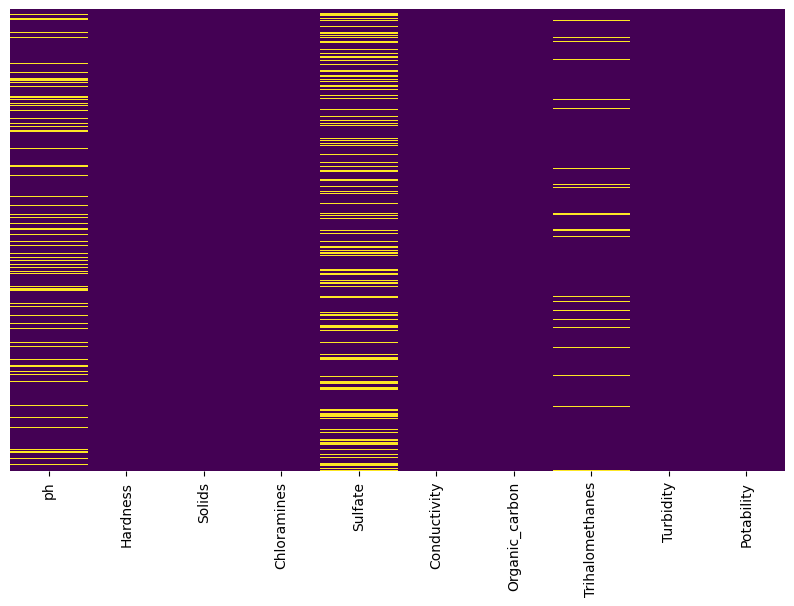

In [7]:
# Visual representation of missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [8]:
from sklearn.impute import SimpleImputer

# Create SimpleImputer object with 'median' strategy
imputer = SimpleImputer(strategy='mean')

# Converting DataFrame into numpy array
data = df.values
X = data[:, :-1]
y = data[:, -1]

# Fit the iamputer model
imputer.fit(X)

# Trained imputer model is applied to dataset
X_transform = imputer.transform(X)

# Convert X_transform back into a DataFrame with column names
X_transform_df = pd.DataFrame(X_transform, columns=df.columns[:-1])

In [9]:
print(f"Missing cells: {sum(np.isnan(X).flatten())}")
print(f"Missing cells: {sum(np.isnan(X_transform).flatten())}")

Missing cells: 1434
Missing cells: 0


In [10]:
# Converting numpy array back in to DataFrame
df_transform = pd.DataFrame(data=X_transform_df)
df_transform

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


<Axes: >

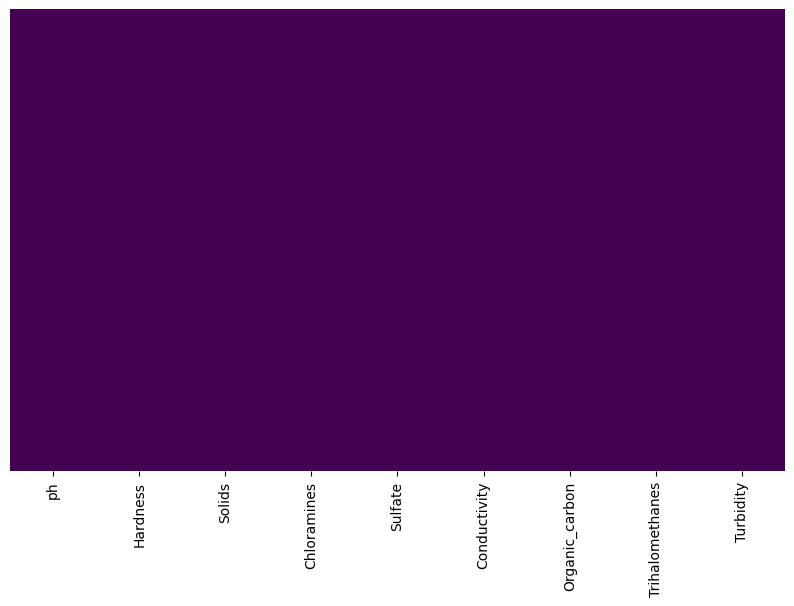

In [11]:
# Visual representation of missing values after SimpleImputer
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)

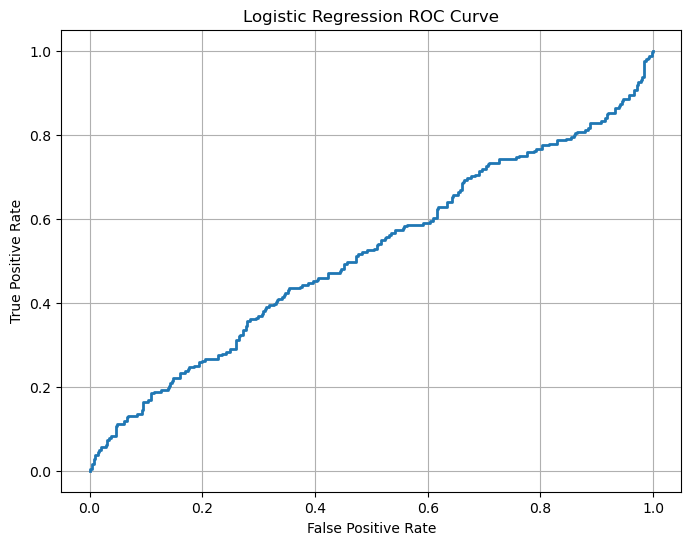

0.6280487804878049


In [13]:
# Logistic Regression Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

def logistic_regression_accuracy_checker(X_train, X_test, y_train, y_test):
    # Create a logistic regression model
    lr_model = LogisticRegression(fit_intercept=True)

    # Fit the model to the training data
    lr_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = lr_model.predict(X_test)

    # Evaluate the model
    accuracy_logistic_regression = accuracy_score(y_test, y_pred)
    
    probas = lr_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probas)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.grid(True)
    plt.show()
    
    return accuracy_logistic_regression
value = logistic_regression_accuracy_checker(X_train, X_test, y_train, y_test)
print(value)

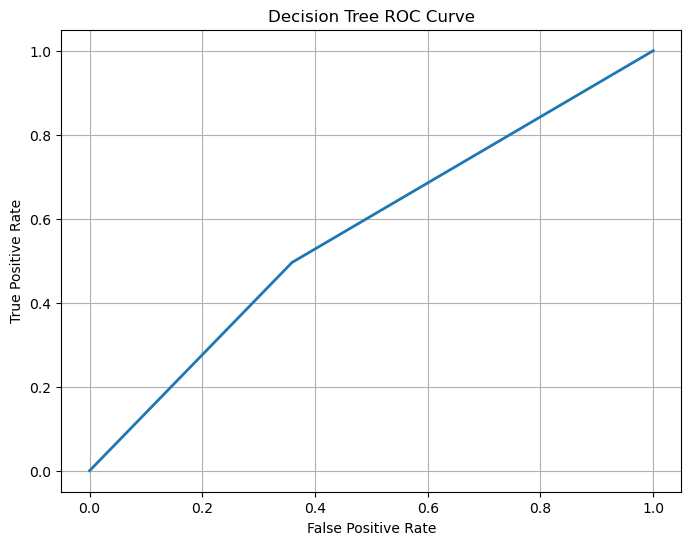

0.586890243902439


In [14]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

def decision_tree_classification_accuracy_checker(X_train, X_test, y_train, y_test):
    # Create a decision tree model
    dt_model = DecisionTreeClassifier(random_state=0)

    # Fit the model to the training data
    dt_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = dt_model.predict(X_test)

    # Evaluate the model
    accuracy_decision_tree = accuracy_score(y_test, y_pred)
    
    probas = dt_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probas)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree ROC Curve')
    plt.grid(True)
    plt.show()

    # Print the results
    #print("Decision Tree Classifier Accuracy:", accuracy_decision_tree)
    return accuracy_decision_tree
    
value2 = decision_tree_classification_accuracy_checker(X_train, X_test, y_train, y_test)
print(value2)

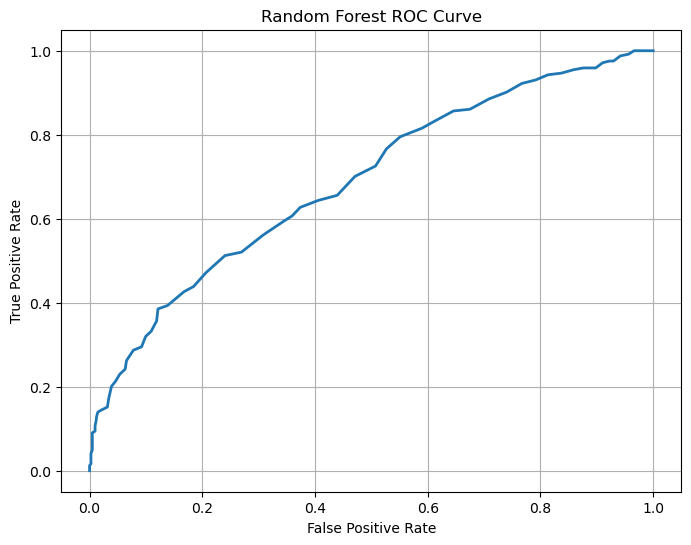

0.6859756097560976


In [15]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

def random_forest_classification_accuracy_checker(X_train, X_test, y_train, y_test):
    # Create a random forest model
    rfc_model = RandomForestClassifier(random_state=0)

    # Fit the model to the training data
    rfc_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rfc_model.predict(X_test)

    # Evaluate the model
    accuracy_random_forest = accuracy_score(y_test, y_pred)
    
    probas = rfc_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probas)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest ROC Curve')
    plt.grid(True)
    plt.show()
    
    return accuracy_random_forest
    
value3 = random_forest_classification_accuracy_checker(X_train, X_test, y_train, y_test)
print(value3)

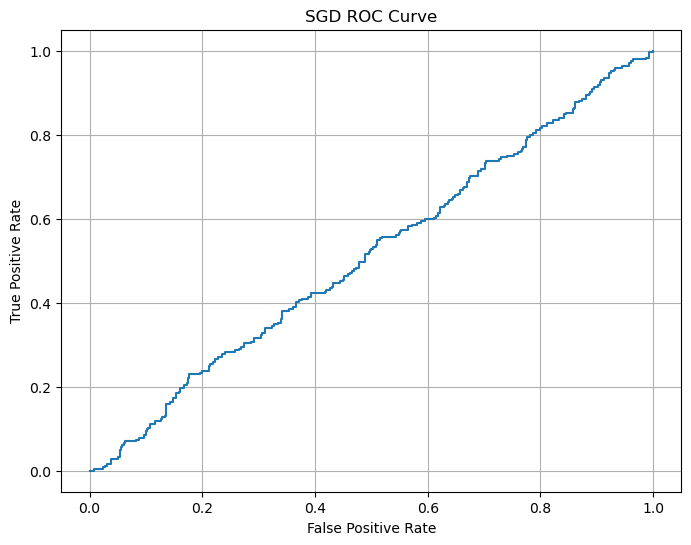

0.6280487804878049


In [16]:
# SGD Classification
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

def sgd_classifier_accuracy_checker(X_train, X_test, y_train, y_test):
    
    # Create a SGD model
    sgd_model = SGDClassifier(random_state=42)

    # Fit the model to the training data
    sgd_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = sgd_model.predict(X_test)

    # Evaluate the model
    accuracy_sgd_classifier = accuracy_score(y_test, y_pred)
    
    y_scores = sgd_model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    # Calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SGD ROC Curve')
    plt.grid(True)
    plt.show()

    # Print the results
    return accuracy_sgd_classifier

value4 = sgd_classifier_accuracy_checker(X_train, X_test, y_train, y_test)
print(value4)

/Users/simranmodi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


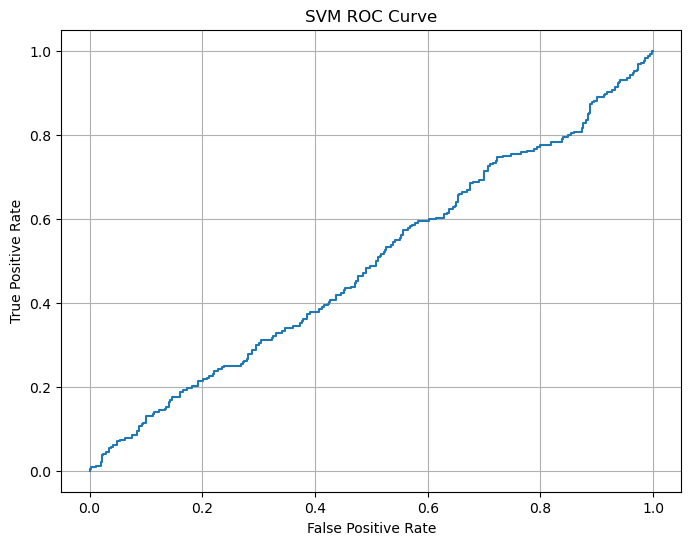

0.6234756097560976


In [17]:
# Linear SVM Classification
from sklearn.svm import LinearSVC

def linear_svm_classifier_accuracy_checker(X_train, X_test, y_train, y_test):
    
    # Create a linear SVM model
    svm_model = LinearSVC(random_state=42, dual=True, max_iter=100)

    # Fit the model to the training data
    svm_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    accuracy_linear_svm = accuracy_score(y_test, y_pred)
    
    y_scores = svm_model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    # Calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM ROC Curve')
    plt.grid(True)
    plt.show()
    
    return accuracy_linear_svm

value5 = linear_svm_classifier_accuracy_checker(X_train, X_test, y_train, y_test)
print(value5)

In [18]:
# Collect the accuracies of different classifiers
def give_and_plot_accuracies(X_train, X_test, y_train, y_test):
    accuracies = {
        'Logistic Regression': logistic_regression_accuracy_checker(X_train, X_test, y_train, y_test),
        'Linear SVM': linear_svm_classifier_accuracy_checker(X_train, X_test, y_train, y_test),
        'Random Forest': random_forest_classification_accuracy_checker(X_train, X_test, y_train, y_test),
        'Decision Tree': decision_tree_classification_accuracy_checker(X_train, X_test, y_train, y_test),
        'SGD Classifier': sgd_classifier_accuracy_checker(X_train, X_test, y_train, y_test)
    }

    # Create a bar plot using Seaborn
    ax = sns.barplot(x=list(accuracies.values()), y=list(accuracies.keys()))
    plt.xlabel('Accuracy')
    plt.title('Classifier Accuracies')
    return accuracies

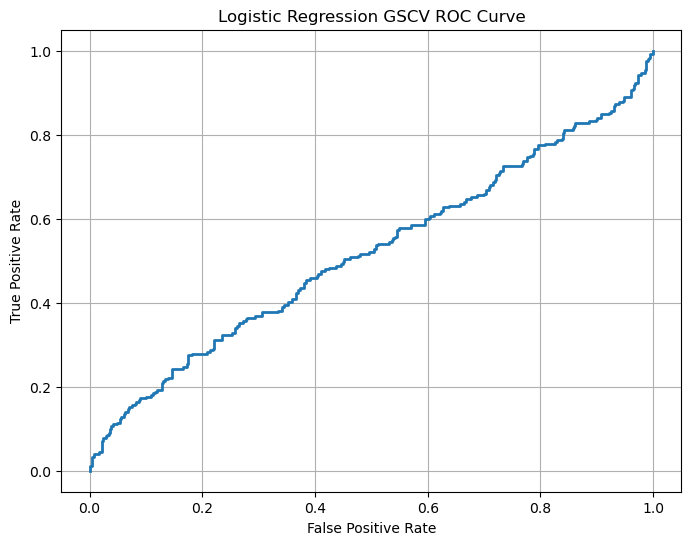

Best Hyperparameters for Logistic Regression: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Classifier (GridSearchCV) Accuracy: 0.6280487804878049


In [19]:
from sklearn.model_selection import GridSearchCV

# Create a logistic regression model & fine tuning hyperparameters with GridSearchCV
lr_model = LogisticRegression(fit_intercept=True)

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_lr = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred_lr = best_model_lr.predict(X_test)

# Evaluate the model
accuracy_logistic_regression2 = accuracy_score(y_test, y_pred_lr)

probas = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probas)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression GSCV ROC Curve')
plt.grid(True)
plt.show()

# Print the best hyperparameters and results
print("Best Hyperparameters for Logistic Regression:", grid_search.best_params_)
print("Logistic Regression Classifier (GridSearchCV) Accuracy:", accuracy_logistic_regression2)

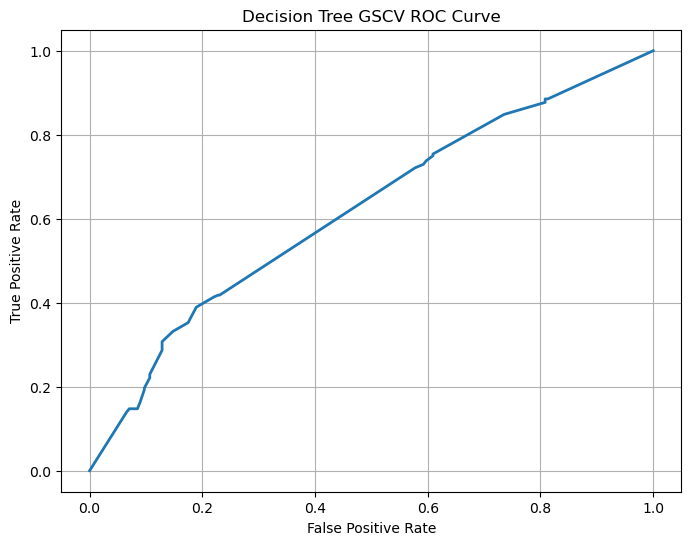

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Classifier (GridSearchCV) Accuracy: 0.6539634146341463


In [20]:
# Create a decision tree model & fine tuning hyperparameters with GridSearchCV
dt_model = DecisionTreeClassifier(random_state=0)

# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_dt_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the model
accuracy_decision_tree2 = accuracy_score(y_test, y_pred_dt)

probas = best_dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probas)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree GSCV ROC Curve')
plt.grid(True)
plt.show()

# Print the best hyperparameters and results
print("Best Hyperparameters for Decision Tree:", grid_search.best_params_)
print("Decision Tree Classifier (GridSearchCV) Accuracy:", accuracy_decision_tree2)

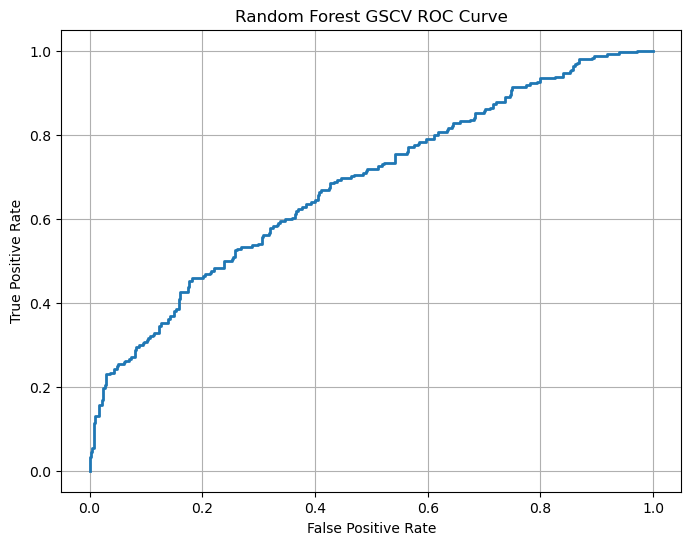

Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Classifier (GridSearchCV) Accuracy: 0.6783536585365854


In [21]:
# Create a random forest classifier model & fine tuning hyperparameters with GridSearchCV
from sklearn.model_selection import GridSearchCV
rfc_model = RandomForestClassifier(random_state=0)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_rfc_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred_rfc = best_rfc_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_random_forest2 = accuracy_score(y_test, y_pred_rfc)

probas = best_rfc_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probas)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest GSCV ROC Curve')
plt.grid(True)
plt.show()

# Print the best hyperparameters and results
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)
print("Random Forest Classifier (GridSearchCV) Accuracy:", accuracy_random_forest2)

In [22]:
# Create a sgd classifier model & fine tuning hyperparameters with GridSearchCV
from sklearn.model_selection import GridSearchCV
sgd_model = SGDClassifier(random_state=0)

# Define a grid of hyperparameters to search
param_grid = {
    'loss': ['log', 'modified_huber'],  # Loss function
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Penalty type
    'max_iter': [1000, 2000, 3000],  # Maximum number of iterations
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(estimator=sgd_model, param_grid=param_grid, cv=3, error_score=0)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_sgd_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred_sgd = best_sgd_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_sgd_classifier2 = accuracy_score(y_test, y_pred_sgd)

# Get predicted probabilities for the positive class
y_scores = best_sgd_model.predict_proba(X_test)[:, 1]

# Print the best hyperparameters and results
print("Best Hyperparameters for SGD:", grid_search.best_params_)
print("SGD Classifier (GridSearchCV) Accuracy:", accuracy_sgd_classifier2)

Best Hyperparameters for SGD: {'alpha': 0.001, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'elasticnet'}
SGD Classifier (GridSearchCV) Accuracy: 0.6280487804878049


/Users/simranmodi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/simranmodi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/simranmodi/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/simranmodi/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constrain

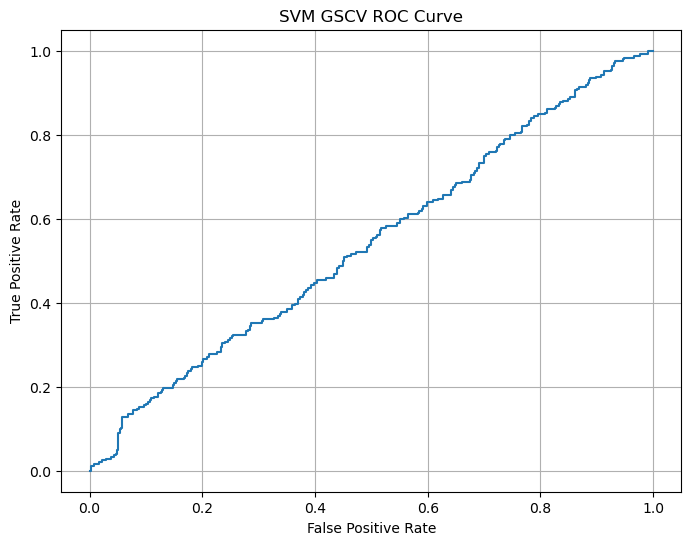

Best Hyperparameters for SVM Classifier: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Classifier (GridSearchCV) Accuracy: 0.6265243902439024


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create an SVM Classifier model
svm_model = SVC()

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Kernel type
    'gamma': ['scale', 'auto'],    # Kernel coefficient (for 'rbf' kernel)
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_svm_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the SVM Classifier model
accuracy_svm_classifier = accuracy_score(y_test, y_pred_svm)

y_scores = best_svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM GSCV ROC Curve')
plt.grid(True)
plt.show()

# Print the best hyperparameters and results
print("Best Hyperparameters for SVM Classifier:", grid_search.best_params_)
print("SVM Classifier (GridSearchCV) Accuracy:", accuracy_svm_classifier)

In [24]:
# features_planned_to_remove = ['Turbidity','Conductivity','Trihalomethanes','Organic_carbon','Solids']

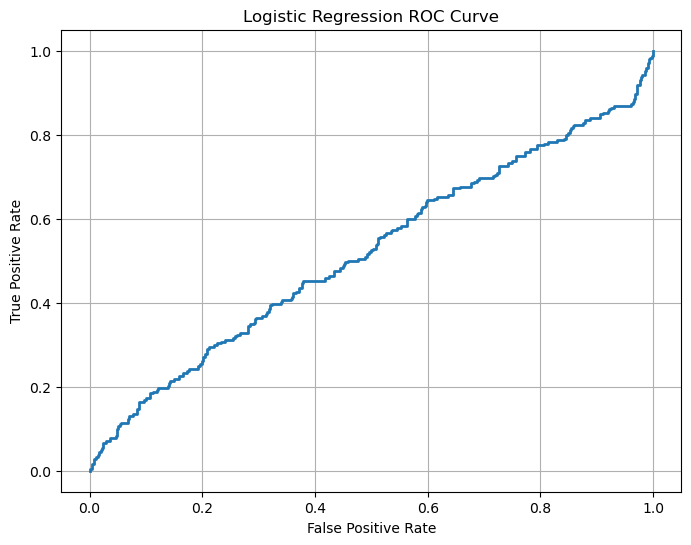

/Users/simranmodi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


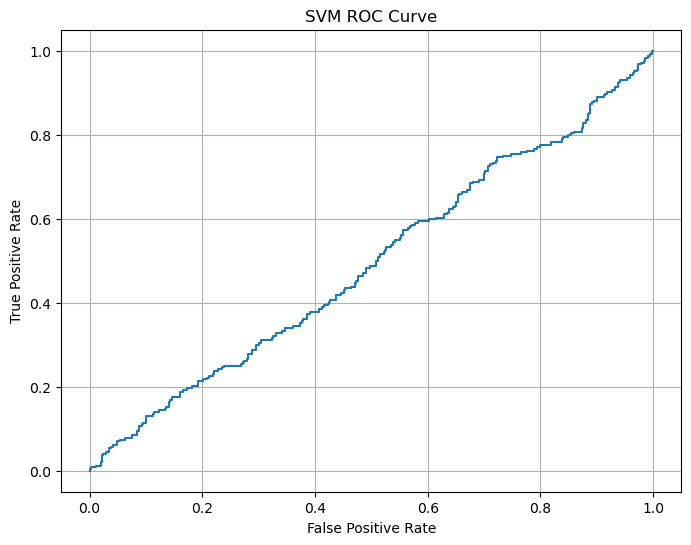

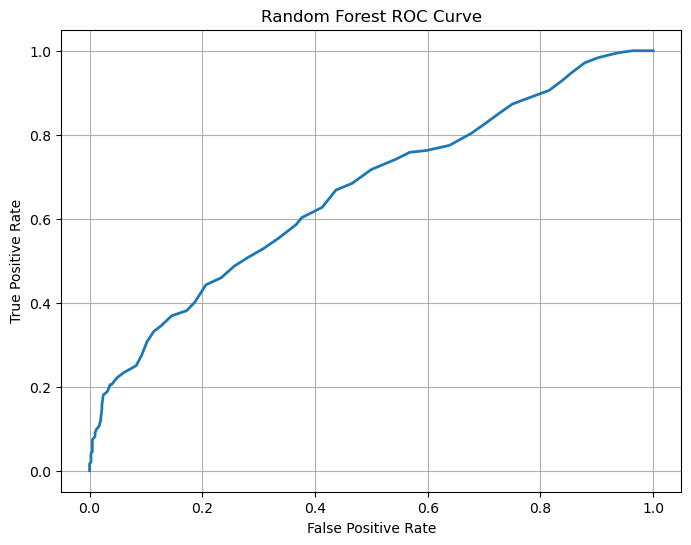

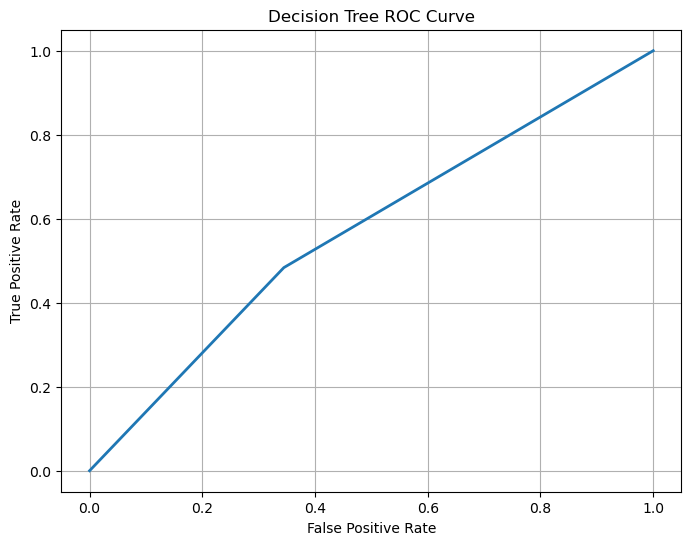

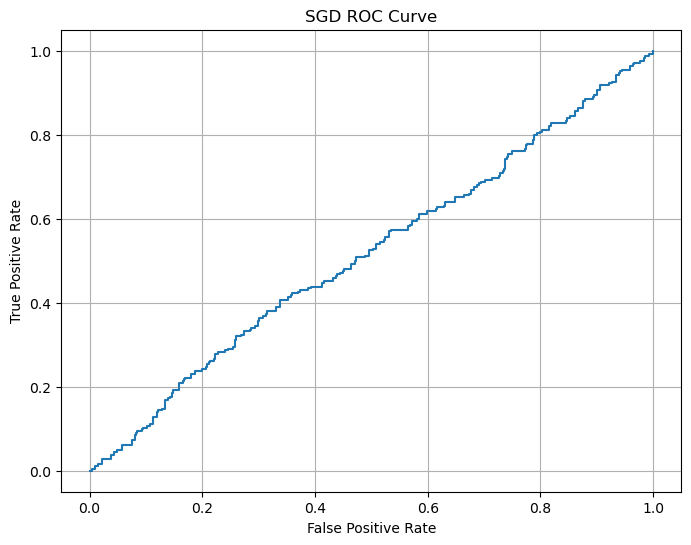

Logistic Regression:0.6280487804878049
Linear SVM:0.6234756097560976
Random Forest:0.676829268292683
Decision Tree:0.5914634146341463
SGD Classifier:0.6280487804878049


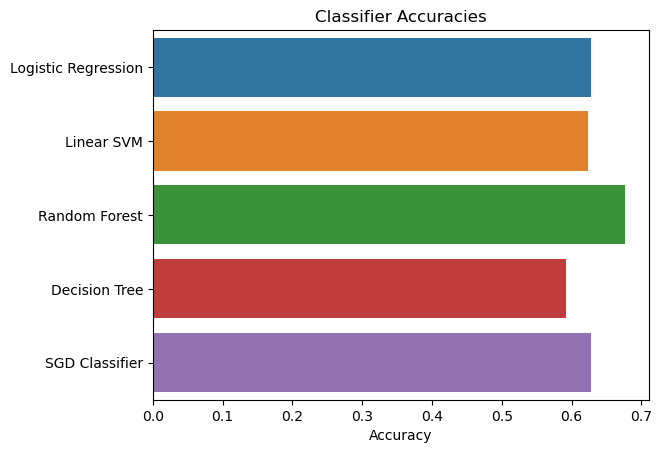

In [25]:
# Removing Turbidity 
X_transform_without_turbidity = X_transform_df.drop(['Turbidity'], axis=1)

# Split the data into training and testing sets
X_train_without_turbidity, X_test_without_turbidity, y_train_without_turbidity, y_test_without_turbidity = train_test_split(X_transform_without_turbidity, y, test_size=0.2, random_state=42)

# Checking the accuracy after the change
model_accuracies_without_turbidity = give_and_plot_accuracies(X_train_without_turbidity, X_test_without_turbidity, y_train_without_turbidity, y_test_without_turbidity)

for i in model_accuracies_without_turbidity:
    print(i+":"+str(model_accuracies_without_turbidity[i]))

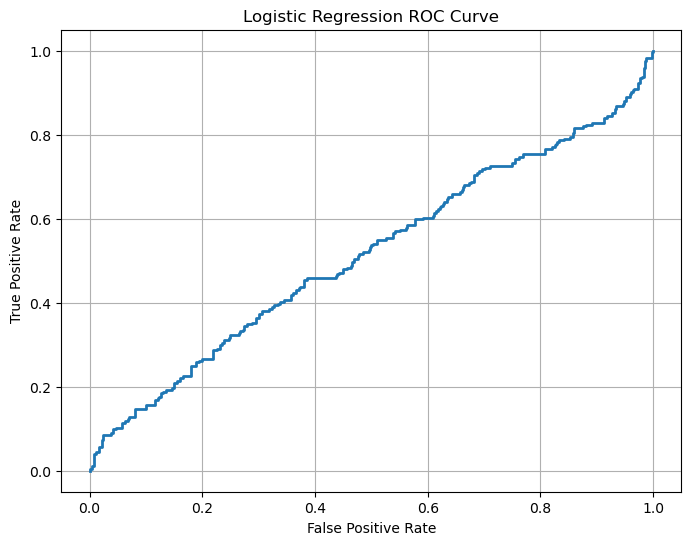

/Users/simranmodi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


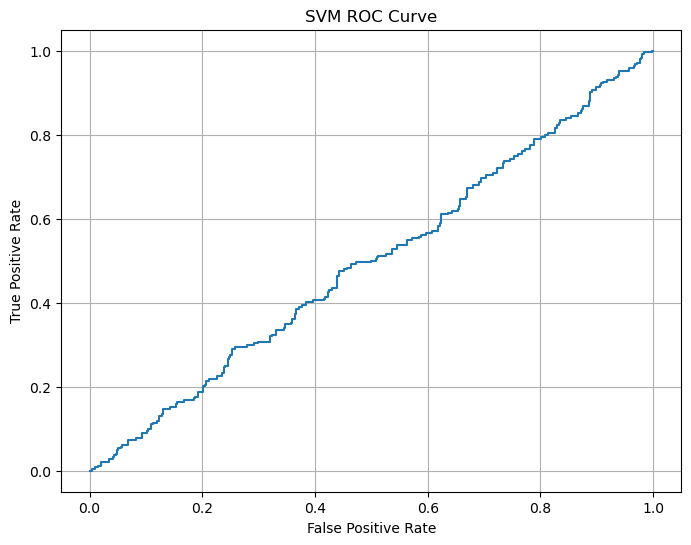

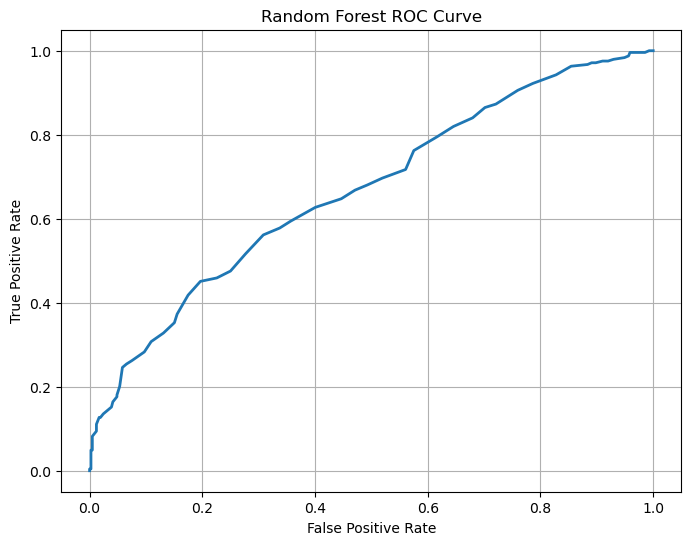

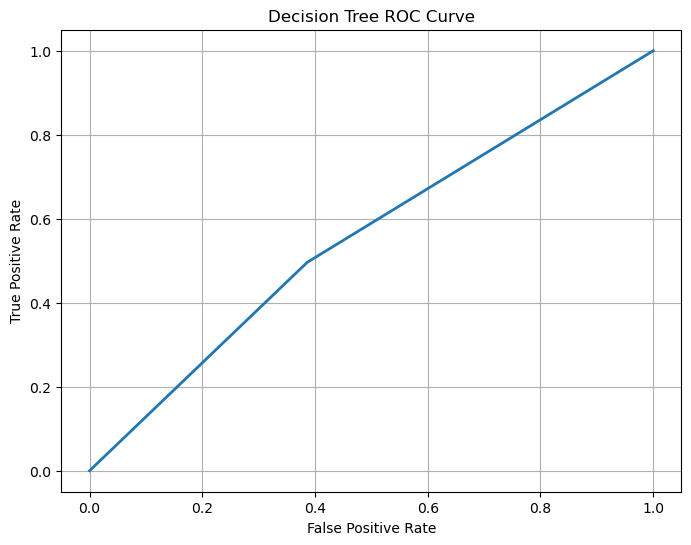

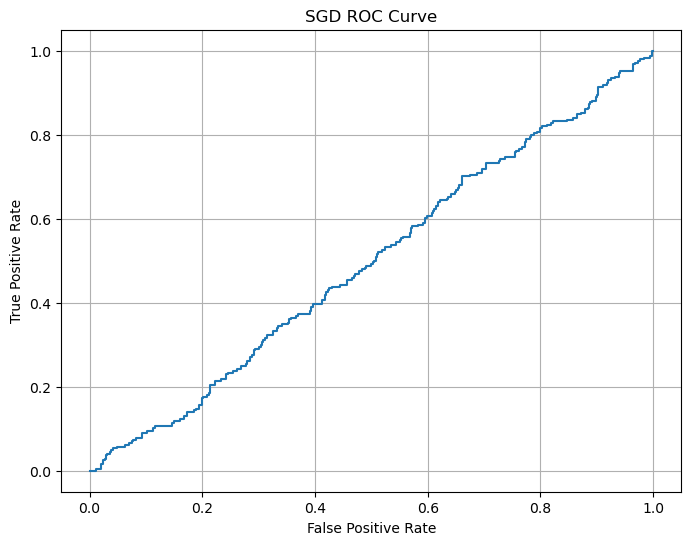

Logistic Regression:0.6280487804878049
Linear SVM:0.3719512195121951
Random Forest:0.6676829268292683
Decision Tree:0.5701219512195121
SGD Classifier:0.6280487804878049


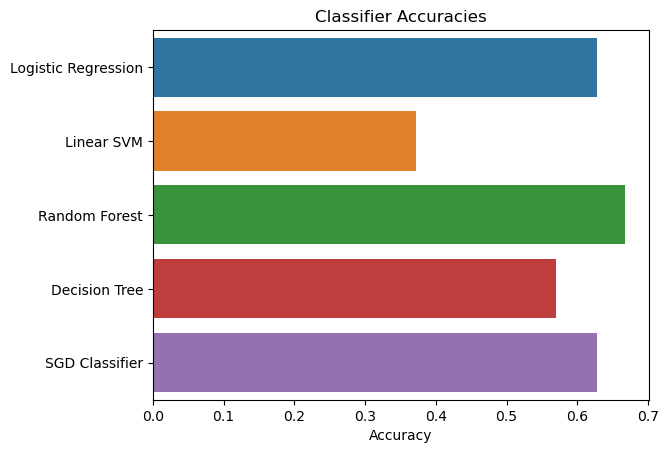

In [26]:
# Removing Conductivity 
X_transform_without_conductivity = X_transform_df.drop(['Conductivity'], axis=1)

# Split the data into training and testing sets
X_train_without_conductivity, X_test_without_conductivity, y_train_without_conductivity, y_test_without_conductivity = train_test_split(X_transform_without_conductivity, y, test_size=0.2, random_state=42)

# Checking the accuracy after the change
model_accuracies_without_conductivity = give_and_plot_accuracies(X_train_without_conductivity, X_test_without_conductivity, y_train_without_conductivity, y_test_without_conductivity)

for i in model_accuracies_without_conductivity:
    print(i+":"+str(model_accuracies_without_conductivity[i]))

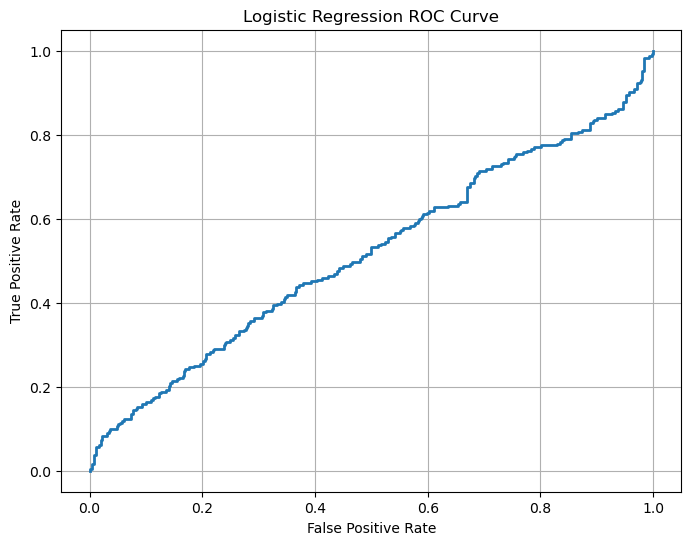

/Users/simranmodi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


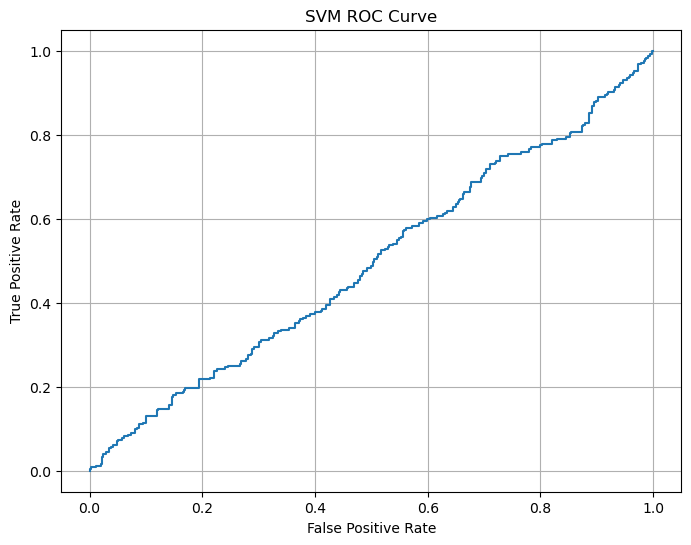

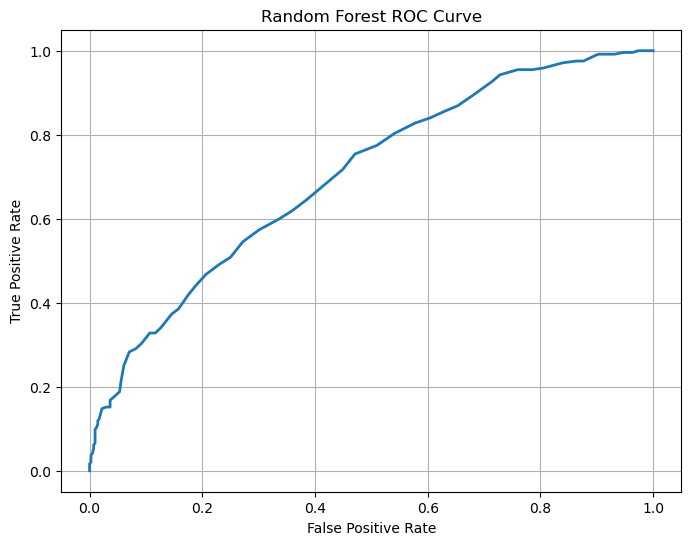

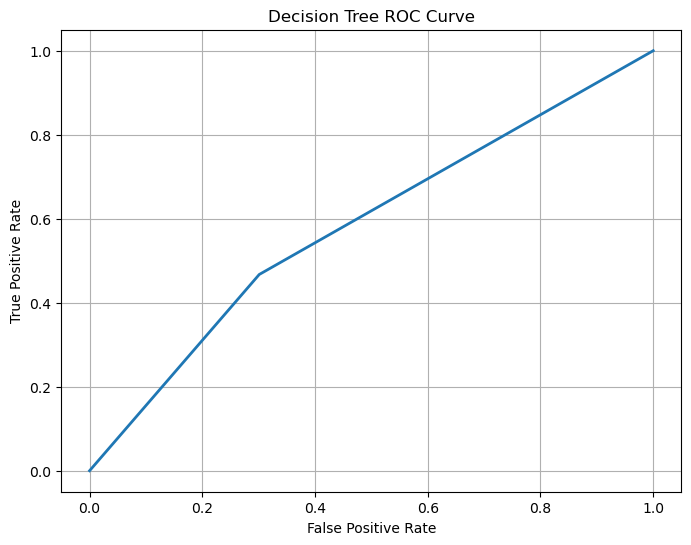

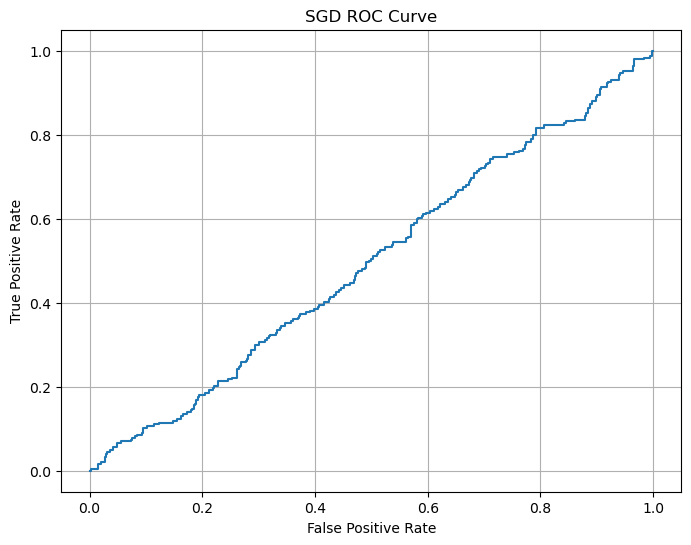

Logistic Regression:0.6280487804878049
Linear SVM:0.6234756097560976
Random Forest:0.6753048780487805
Decision Tree:0.6128048780487805
SGD Classifier:0.6280487804878049


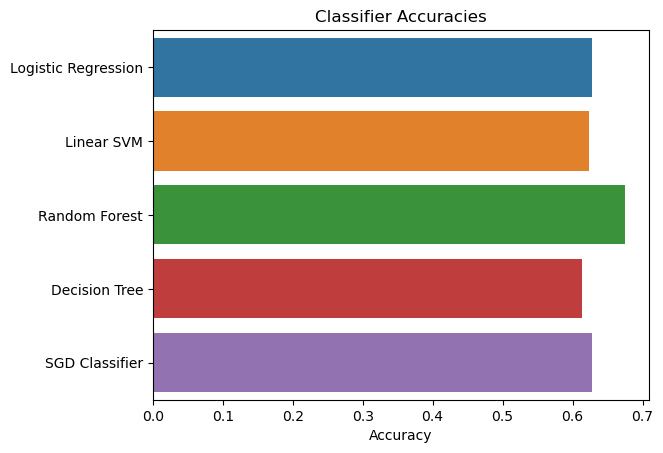

In [27]:
# Removing Organic_carbon & Trihalomethanes 
X_transform_without_carbon_and_methane = X_transform_df.drop(['Organic_carbon','Trihalomethanes'], axis=1)

# Split the data into training and testing sets
X_train_without_carbon_and_methane, X_test_without_carbon_and_methane, y_train_without_carbon_and_methane, y_test_without_carbon_and_methane = train_test_split(X_transform_without_carbon_and_methane, y, test_size=0.2, random_state=42)

# Checking the accuracy after the change
model_accuracies_without_carbon_and_methane = give_and_plot_accuracies(X_train_without_carbon_and_methane, X_test_without_carbon_and_methane, y_train_without_carbon_and_methane, y_test_without_carbon_and_methane)

for i in model_accuracies_without_carbon_and_methane:
    print(i+":"+str(model_accuracies_without_carbon_and_methane[i]))


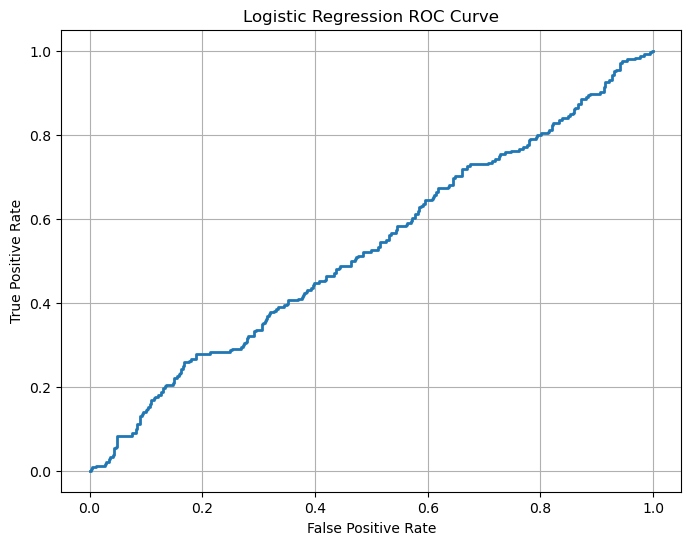

/Users/simranmodi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


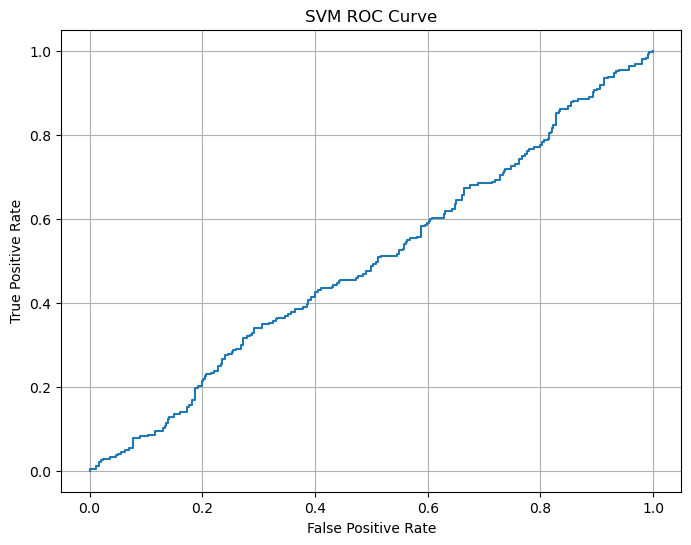

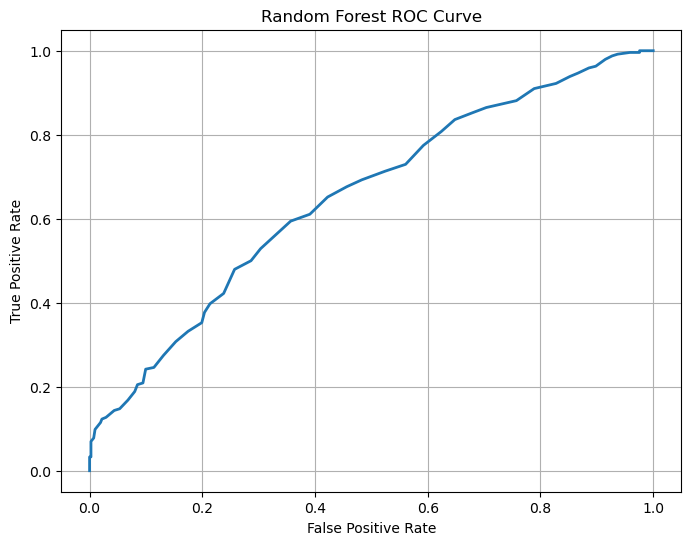

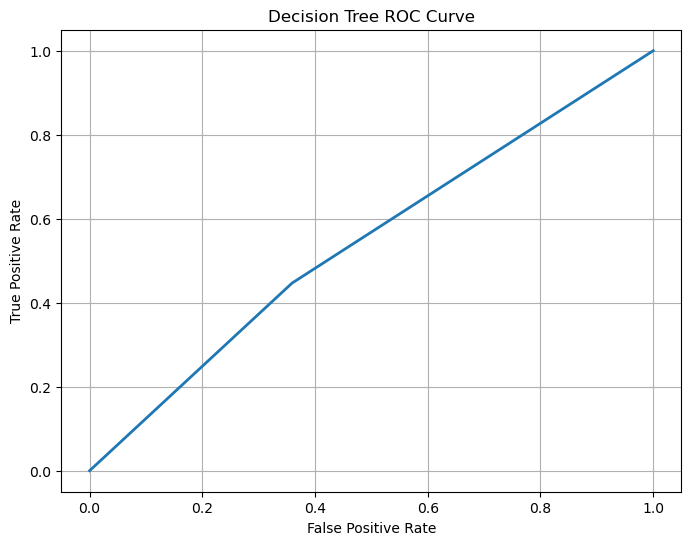

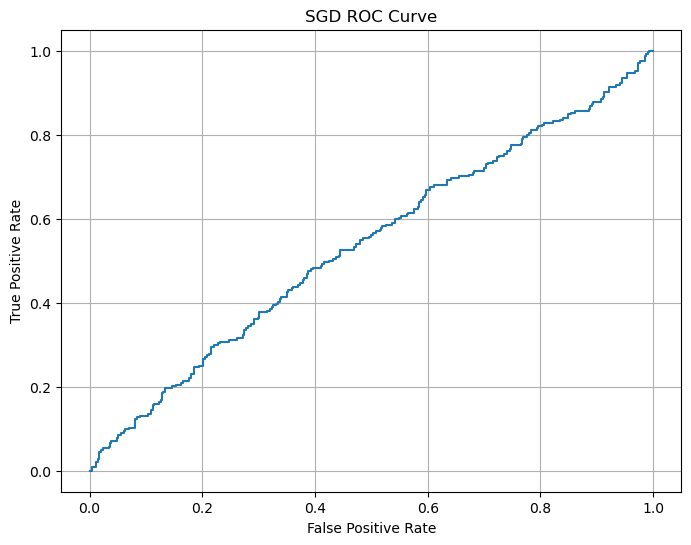

Logistic Regression:0.6280487804878049
Linear SVM:0.3719512195121951
Random Forest:0.6463414634146342
Decision Tree:0.5685975609756098
SGD Classifier:0.6280487804878049


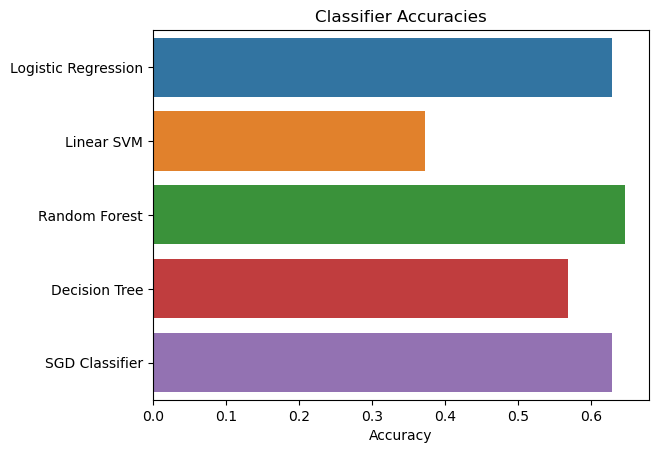

In [28]:
# Removing Solids 
X_transform_without_solids = X_transform_df.drop(['Solids'], axis=1)

# Split the data into training and testing sets
X_train_without_solids, X_test_without_solids, y_train_without_solids, y_test_without_solids = train_test_split(X_transform_without_solids, y, test_size=0.2, random_state=42)

# Checking the accuracy after the change
model_accuracies_without_solids = give_and_plot_accuracies(X_train_without_solids, X_test_without_solids, y_train_without_solids, y_test_without_solids)

for i in model_accuracies_without_solids:
    print(i+":"+str(model_accuracies_without_solids[i]))
